In [ ]:
# Challenge on predicting of resolvability of crimes for BATMAN


## Introduction
The data set was download in this url:<a>https://data.sfgov.org/Public-Safety/SFPD-Incidents-Current-Year-2015-/ritf-b9ki</a>. 
The data is thin, it contains

* Dates - timestamp of the crime incident
* Category - category of the crime incident (only in train.csv). This is the target variable you are going to predict.
* Descript - detailed description of the crime incident (only in train.csv)
* DayOfWeek - the day of the week
* PdDistrict - name of the Police Department District
* Resolution - how the crime incident was resolved (only in train.csv)
* X - Longitude
* Y - Latitude




** The goal is to predict the <code>Resolution</code> column. The prediction quality is measured by RMSE**. 



In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Fetch the data and load it in pandas

In [3]:
import os

In [4]:
local_filename = 'data/out.csv'
data = pd.read_csv(local_filename, index_col=0)

In [5]:
data.shape

(153618, 10)

In [6]:
data.columns.values
data = data.reset_index()

In [7]:
data.head()

,index,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,X,Y
0,0,160000108,ASSAULT,BATTERY,Thursday,12/31/2015,23:58,Otisburg,1,-122.403405,37.775421
1,1,166004914,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Thursday,12/31/2015,23:55,Otisburg,0,-122.411626,37.778590
2,2,160000095,ASSAULT,INFLICT INJURY ON COHABITEE,Thursday,12/31/2015,23:54,Burnley,1,-122.404263,37.711339
3,3,160038137,OTHER OFFENSES,VIOLATION OF RESTRAINING ORDER,Thursday,12/31/2015,23:51,Burnley,0,-122.420557,37.710895
4,4,166002930,NON-CRIMINAL,LOST PROPERTY,Thursday,12/31/2015,23:50,East End,0,-122.415844,37.787402


In [8]:
print min(data['Date'])
print max(data['Date'])

01/01/2015
12/31/2015


In [9]:
data['PdDistrict'].unique()

array(['Otisburg', 'Burnley', 'East End', 'Old Gotham', 'Robinson Park',
       'Chinatown', 'Bristol County', 'The Bowery', 'Diamond',
       'Falcone Penthouse'], dtype=object)

In [10]:
data['Category'].unique()

array(['ASSAULT', 'VANDALISM', 'OTHER OFFENSES', 'NON-CRIMINAL',
       'LARCENY/THEFT', 'VEHICLE THEFT', 'BURGLARY', 'ROBBERY', 'WARRANTS',
       'SUSPICIOUS OCC', 'WEAPON LAWS', 'DRUNKENNESS', 'TRESPASS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'MISSING PERSON',
       'SECONDARY CODES', 'FRAUD', 'EMBEZZLEMENT',
       'SEX OFFENSES, FORCIBLE', 'BRIBERY', 'STOLEN PROPERTY',
       'DISORDERLY CONDUCT', 'ARSON', 'FAMILY OFFENSES', 'RUNAWAY',
       'DRIVING UNDER THE INFLUENCE', 'KIDNAPPING', 'PROSTITUTION',
       'SUICIDE', 'LIQUOR LAWS', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'SEX OFFENSES, NON FORCIBLE', 'LOITERING',
       'PORNOGRAPHY/OBSCENE MAT', 'TREA'], dtype=object)

In [21]:
a=data.Resolution.value_counts()
print "0 porpotion:", float(a[0])/(a[0]+a[1])
print "1 propotion:", float(a[1])/(a[0]+a[1])

0 porpotion: 0.7373354685
1 propotion: 0.2626645315


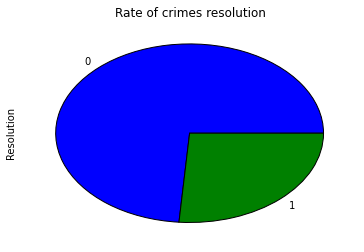

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
data.Resolution.value_counts().plot(kind='pie')
plt.title('Rate of crimes resolution')

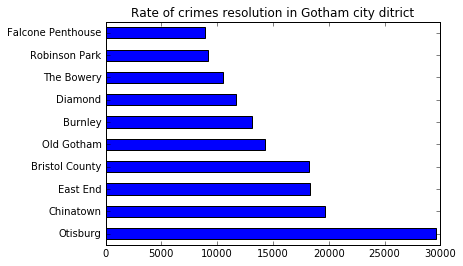

In [137]:

data.PdDistrict.value_counts().plot(kind='barh')
plt.title('Rate of crimes resolution in Gotham city ditrict')

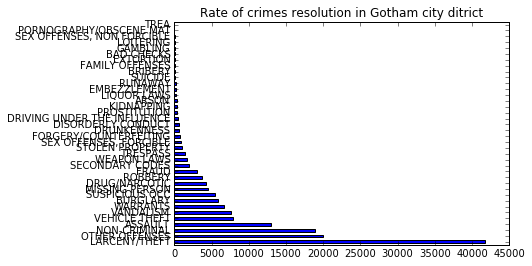

In [138]:
data.Category.value_counts().plot(kind='barh')
plt.title('Rate of crimes resolution in Gotham city ditrict')

In [177]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [178]:
from sklearn import svm
mod = svm.SVC()

In [179]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [180]:
from sklearn.preprocessing import LabelEncoder
mod = MultiColumnLabelEncoder()

X_t = mod.fit_transform(data)

In [250]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#mod = RandomForestClassifier(n_estimators=200)
mod = LogisticRegression() 
features = X_t.drop(['Resolution'], axis=1)
X_columns = X_t.columns.drop(['Resolution'])
X = features.values
y= X_t['Resolution'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

clf = mod.fit(X_train,y_train)
y_pred = clf.predict(X_train)

print ("Score",accuracy_score(y_train, y_pred, normalize=True))

('Score', 0.73797744397610954)


In [251]:
clf = mod.fit(X_test,y_test)
y_pred = clf.predict(X_test)

print ("Score",accuracy_score(y_test, y_pred, normalize=True))

('Score', 0.73200104153105061)
